# Estimating stock volatility using the exponent of anomalous diffusion processes

## Study

### Download the historical data 

In [4]:
import datetime
import os
import pandas as pd
from dateutil.relativedelta import relativedelta

from create_datasets import compute_returns, create_df_file, historical_vol
from download_data import download_ATM_vol

In [5]:
data = 'analisis/S&P_500.xlsx'
df = pd.read_excel(data)
tickers = df['Identifier'].to_list()
print("S&P500 df:",df.shape,"\nNumber of industries",len(set(df['Industry Name'])))
df.head()

S&P500 df: (484, 3) 
Number of industries 100


,Identifier,Company Name,Industry Name
0,AFL.N,Aflac Inc,Life & Health Insurance
1,AES.N,AES Corp,Electric Utilities
2,ABT.N,Abbott Laboratories,"Medical Equipment, Supplies & Distribution"
3,ADBE.OQ,Adobe Inc,Software
4,AMD.OQ,Advanced Micro Devices Inc,Semiconductors


Onces we have the names of the 500 companies we obtain the closing price from 1st of March 2012 to 1st of March of 2024.

In [3]:
start_data = datetime.datetime(year=2012,month=3,day=29)
end_data = datetime.datetime(year=2024,month=3,day=1)
now = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

start_window = datetime.datetime(year=2012,month=4,day=1)
end_window = datetime.datetime(year=2016,month=4,day=1)

In [4]:
month_jumps = 1
num_of_jumps = 8*12-1
lenghts_min = [10,100,400,800]
lenghts_max = [20,200,500,1_000]

df_files = create_df_file('data')
current_files = os.listdir('data')

And compute the returns for the stocks in the S&P 500 index

In [5]:
for i in range(len(tickers)):
    compute_returns(i,tickers,start_data,end_data, start_window, end_window, month_jumps, num_of_jumps, lenghts_min, lenghts_max, df_files,current_files, now)
    print(f'{i+1}/{len(tickers)}',tickers[i])

0 AFL.N 0:00:00.658112
1/484 AFL.N
1 AES.N 0:00:00.485620
2/484 AES.N
2 ABT.N 0:00:00.449964
3/484 ABT.N
3 ADBE.OQ 0:00:00.390167
4/484 ADBE.OQ
4 AMD.OQ 0:00:00.512424
5/484 AMD.OQ
5 APD.N 0:00:00.554217
6/484 APD.N
6 ALK.N 0:00:00.472133
7/484 ALK.N
7 ALB.N 0:00:00.455126
8/484 ALB.N
8 HON.OQ 0:00:00.992335
9/484 HON.OQ
9 ALL.N 0:00:00.650508
10/484 ALL.N
10 HWM.N 0:00:01.056130
11/484 HWM.N
11 HES.N 0:00:01.523002
12/484 HES.N
12 AEE.N 0:00:00.566964
13/484 AEE.N
13 AEP.OQ 0:00:00.419522
14/484 AEP.OQ
14 AXP.N 0:00:00.593701
15/484 AXP.N
15 AIG.N 0:00:00.445513
16/484 AIG.N
16 AME.N 0:00:00.510200
17/484 AME.N
17 AMGN.OQ 0:00:00.580581
18/484 AMGN.OQ
18 APH.N 0:00:00.667371
19/484 APH.N
19 ADI.OQ 0:00:00.425504
20/484 ADI.OQ
20 AON.N 0:00:00.599720
21/484 AON.N
21 APA.OQ 0:00:00.607495
22/484 APA.OQ
22 AAPL.OQ 0:00:00.680104
23/484 AAPL.OQ
23 AMAT.OQ 0:00:00.759613
24/484 AMAT.OQ
24 ADM.N 0:00:00.966406
25/484 ADM.N
25 ATO.N 0:00:00.823134
26/484 ATO.N
26 ADSK.OQ 0:00:00.445244
27/48

Download the implied volatility (explica que es y cual usamos exactamente)

In [6]:
start_window = datetime.datetime(year=2012,month=4,day=1)
end_window = datetime.datetime(year=2024,month=4,day=1)

In [7]:
df = download_ATM_vol(df,start_window,end_window)

0 CEG.OQ
1 OGN.N
2 OTIS.N
3 CARR.N
4 AMCR.N
5 CTVA.N
6 DOW.N
7 FOX.OQ
8 FOXA.OQ
9 MRNA.OQ
10 LIN.N
11 VICI.N
12 DD.N
13 IR.N
14 LW.N
15 FTV.N
16 STE.N
17 MTCH.OQ
18 HPE.N
19 PYPL.OQ
20 KHC.OQ
21 WRK.N
22 ETSY.OQ
23 QRVO.OQ
24 KEYS.N
25 CZR.OQ
26 CFG.N
27 SEDG.OQ
28 SYF.N
29 CTLT.N
30 PAYC.N
31 ANET.N
32 GOOG.OQ
33 AAL.OQ
34 HLT.N
35 ALLE.N
36 CDW.OQ
37 NWS.OQ
38 NWSA.OQ
39 IQV.N
40 ZTS.N
41 ABBV.N
42 PSX.N
43 NOW.N
44 FANG.OQ
45 META.OQ
46 NCLH.N
47 FLT.N
48 ENPH.OQ
49 EPAM.N
50 APTV.N
51 XYL.N
52 MPC.N
53 HII.N
54 GM.N
55 HCA.N
56 KMI.N
57 NXPI.OQ
58 TSLA.OQ
59 CBOE.Z
60 LYB.N
61 GNRC.N
62 CHTR.OQ
63 FTNT.OQ
64 DG.N
65 MRK.N
66 VRSK.OQ
67 AVGO.OQ
68 WBD.OQ
69 KDP.OQ
70 AWK.N
71 V.N
72 PM.N
73 MSCI.N
74 ULTA.OQ
75 DFS.N
76 TEL.N
77 DAL.N
78 BR.N
79 TDG.N
80 UAL.OQ
81 CMG.N
82 LYV.N
83 PARA.OQ
84 LDOS.N
85 ICE.N
86 MA.N
87 AMP.N
88 CF.N
89 EXPE.OQ
90 DXCM.OQ
91 CE.N
92 LVS.N
93 MPWR.OQ
94 MKTX.OQ
95 DLR.N
96 GOOGL.OQ
97 EXR.N
98 TMUS.OQ
99 DPZ.N
100 RF.N
101 CRM.N
102 CBRE.N
103 AIZ.N
1

Compute the historical volatility.

In [8]:
start_data = datetime.datetime(year=2012,month=4,day=1)

lenghts_min = [10,100,400,800]
lenghts_max = [20,200,500,1_000]
month_jump_list = [1,12,24,48]

for len_min,len_max,month_jump in zip(lenghts_min,lenghts_max,month_jump_list):
    historical_vol(tickers, start_data, len_max)
    print(f'{len_min} {len_max} {month_jump}')

10 20 1
100 200 12
400 500 24
800 1000 48


### Model

The UPV-MAT model[ANDI Challenge model](https://github.com/OscarGariboiOrts/ANDI_Challenge/tree/main)


In [4]:
from keras.models import load_model

path_model = "ANDI_Challenge/models/task1/task1_len_10_20.h5"
model = load_model(path_model)

print(model.input_shape)
model.summary()

(None, 20, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 64)            576       
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             32832     
                                                                 
 bidirectional (Bidirectiona  (None, 6, 64)            24832     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 6, 64)             0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 6, 64)            24832     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 64)

In [5]:
path_model = "regression_-005-0.3333.h5"
model = load_model(path_model)
print(model.input_shape)
model.summary()

(None, 23, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 32)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            10304     
                                                                 
 bidirectional (Bidirectiona  (None, 15, 64)           24832     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)    

### Exponent predictions

With the data prepared, and the UPV-MAT model[ANDI Challenge model](https://github.com/OscarGariboiOrts/ANDI_Challenge/tree/main)  we can start to make our prediccionts of the exponente using the model explain previously.


In [13]:
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import load_model
import os
from load_run_models import predict_task1,predict_task2
from dateutil.relativedelta import relativedelta
import seaborn as sns

In [8]:
now = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

start_window = datetime.datetime(year=2012,month=4,day=1)
end_window = datetime.datetime(year=2016,month=4,day=1)

month_jumps = 1
num_of_jumps = 8*12
lenghts_min = [10,100,400,800]
lenghts_max = [20,200,500,1_000]

task = 1
path = 'ANDI_Challenge/models/task'+str(task)
data = 'analisis/S&P_500_exp.xlsx'
df = pd.read_excel(data)

# Loop through all the model for the intervals
for len_min,len_max in zip(lenghts_min,lenghts_max):
    name_model = f'task{task}_len_{len_min}_{len_max}.h5'
    model = load_model(os.path.join(path,name_model))
    
    for jump in range(0,num_of_jumps+1,month_jumps): # Loop through the date to make a rolling window 
        start_date = start_window + relativedelta(months=jump)
        end_date = end_window + relativedelta(months=jump)

        # Make predictions
        df = predict_task1(model,df,start_date, end_date,task,len_min,len_max,now)
    df.to_excel(data,index=False)
    print(len_min,'-',len_max)
    

10 - 20
100 - 200
400 - 500
800 - 1000


Now that we have the predicted exponent for all the companies and for all intervals we can analyze the results. 

In [9]:
data = 'analisis/S&P_500_exp.xlsx'
df = pd.read_excel(data)
print(df.shape)
df.head()

(484, 391)


,Identifier,Company Name,Industry Name,task1_len_10_20_2012-04-01_2016-04-01,task1_len_10_20_2012-05-01_2016-05-01,task1_len_10_20_2012-06-01_2016-06-01,task1_len_10_20_2012-07-01_2016-07-01,task1_len_10_20_2012-08-01_2016-08-01,task1_len_10_20_2012-09-01_2016-09-01,task1_len_10_20_2012-10-01_2016-10-01,...,task1_len_800_1000_2019-07-01_2023-07-01,task1_len_800_1000_2019-08-01_2023-08-01,task1_len_800_1000_2019-09-01_2023-09-01,task1_len_800_1000_2019-10-01_2023-10-01,task1_len_800_1000_2019-11-01_2023-11-01,task1_len_800_1000_2019-12-01_2023-12-01,task1_len_800_1000_2020-01-01_2024-01-01,task1_len_800_1000_2020-02-01_2024-02-01,task1_len_800_1000_2020-03-01_2024-03-01,task1_len_800_1000_2020-04-01_2024-04-01
0,AFL.N,Aflac Inc,Life & Health Insurance,0.959348,0.964121,0.926504,0.924578,0.938306,0.912541,0.911130,...,0.668226,0.658176,0.612339,0.621072,0.649364,0.637304,0.658751,0.651822,0.542427,NaN
1,AES.N,AES Corp,Electric Utilities,0.996048,0.992039,0.954067,0.944598,0.932716,0.997966,0.977847,...,0.512916,0.526264,0.539292,0.605194,0.535703,0.522856,0.524842,0.553242,0.540868,NaN
2,ABT.N,Abbott Laboratories,"Medical Equipment, Supplies & Distribution",0.963707,0.964086,0.949677,0.971546,0.935163,0.903810,0.904841,...,0.610392,0.624433,0.629110,0.606910,0.580822,0.602725,0.711318,0.603388,0.527936,NaN
3,ADBE.OQ,Adobe Inc,Software,0.939528,0.943733,0.923039,0.917141,0.924298,0.948878,0.922875,...,0.899448,0.888585,1.015169,1.083877,1.151834,0.881059,0.779029,0.792226,0.700343,NaN
4,AMD.OQ,Advanced Micro Devices Inc,Semiconductors,1.058579,1.064546,1.030501,1.042941,1.022485,1.025964,0.993146,...,0.859880,0.931343,1.202888,1.208925,1.107388,1.041712,0.881329,0.765979,0.728549,NaN


In [10]:
start_date = datetime.datetime(year=2012,month=7,day=1)
end_date = datetime.datetime(year=2022,month=7,day=1)
print("Number of industries:",len(set(df['Industry Name'])))

Number of industries: 100


In [11]:
df.columns
# Extract the columns for each lenght
lenghts_min = [10,100,400,800]
lenghts_max = [20,200,500,1_000]
dict_len = {}
for len_min, len_max in zip(lenghts_min,lenghts_max):
    dict_len[len_min] = [col.replace(f'task1_len_{len_min}_{len_max}_','').split('_')[1] for col in df.columns if f'{len_min}_{len_max}' in col]


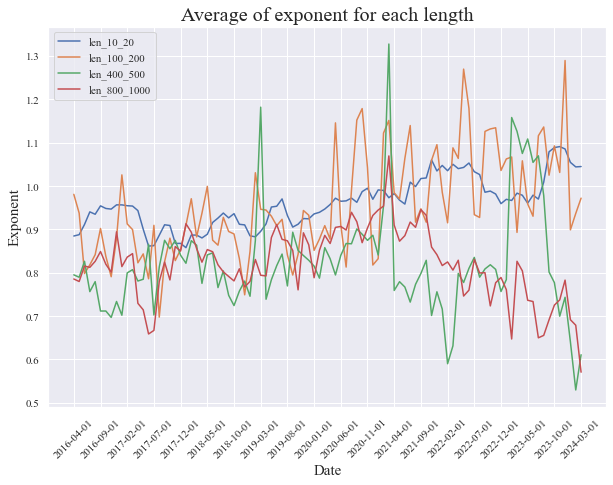

In [36]:
# increase the size of the plot
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
plt.rcParams['font.family'] = 'Times New Roman'

# plot the data in the df for each lenght with the dates in dict_len as x-axis
for (len_min,values),len_max in zip(dict_len.items(),lenghts_max):
    x = [col for col in df.columns if f'len_{len_min}_' in col]
    y = df[x].mean()
    y = df[x].iloc[2,:]
    y = df[x][df['Identifier']== 'MSFT.OQ'].iloc[0,:]

    sns.lineplot(x=values,y=y, label=f'len_{len_min}_{len_max}')
    # change the frequency of the x-axis
    plt.xticks(ticks=range(0,len(y),5),labels=dict_len[len_min][::5],rotation=45)
    # plot the legend

plt.legend()
plt.title(f'Average of exponent for each length', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Exponent', fontsize=15)
plt.savefig('plots/firt_glance_exp.pdf', format='pdf')
plt.show()


### Exponenet behaviour

We can see how the predicted exponent has change during the last years.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import numpy as np

In [2]:
data = 'analisis/S&P_500_exp.xlsx'
start_date = datetime.datetime(year=2012,month=7,day=1)
end_date = datetime.datetime(year=2022,month=7,day=1)

lenghts_min = [10,100,400,800]
lenghts_max = [20,200,500,1_000]

df = pd.read_excel(data)
print(df.shape)
df.head()

(484, 391)


,Identifier,Company Name,Industry Name,task1_len_10_20_2012-04-01_2016-04-01,task1_len_10_20_2012-05-01_2016-05-01,task1_len_10_20_2012-06-01_2016-06-01,task1_len_10_20_2012-07-01_2016-07-01,task1_len_10_20_2012-08-01_2016-08-01,task1_len_10_20_2012-09-01_2016-09-01,task1_len_10_20_2012-10-01_2016-10-01,...,task1_len_800_1000_2019-07-01_2023-07-01,task1_len_800_1000_2019-08-01_2023-08-01,task1_len_800_1000_2019-09-01_2023-09-01,task1_len_800_1000_2019-10-01_2023-10-01,task1_len_800_1000_2019-11-01_2023-11-01,task1_len_800_1000_2019-12-01_2023-12-01,task1_len_800_1000_2020-01-01_2024-01-01,task1_len_800_1000_2020-02-01_2024-02-01,task1_len_800_1000_2020-03-01_2024-03-01,task1_len_800_1000_2020-04-01_2024-04-01
0,AFL.N,Aflac Inc,Life & Health Insurance,0.959348,0.964121,0.926504,0.924578,0.938306,0.912541,0.911130,...,0.668226,0.658176,0.612339,0.621072,0.649364,0.637304,0.658751,0.651822,0.542427,NaN
1,AES.N,AES Corp,Electric Utilities,0.996048,0.992039,0.954067,0.944598,0.932716,0.997966,0.977847,...,0.512916,0.526264,0.539292,0.605194,0.535703,0.522856,0.524842,0.553242,0.540868,NaN
2,ABT.N,Abbott Laboratories,"Medical Equipment, Supplies & Distribution",0.963707,0.964086,0.949677,0.971546,0.935163,0.903810,0.904841,...,0.610392,0.624433,0.629110,0.606910,0.580822,0.602725,0.711318,0.603388,0.527936,NaN
3,ADBE.OQ,Adobe Inc,Software,0.939528,0.943733,0.923039,0.917141,0.924298,0.948878,0.922875,...,0.899448,0.888585,1.015169,1.083877,1.151834,0.881059,0.779029,0.792226,0.700343,NaN
4,AMD.OQ,Advanced Micro Devices Inc,Semiconductors,1.058579,1.064546,1.030501,1.042941,1.022485,1.025964,0.993146,...,0.859880,0.931343,1.202888,1.208925,1.107388,1.041712,0.881329,0.765979,0.728549,NaN


In [3]:
# Broad sector categorization based on the industry
broad_sectors = {
    "Consumer Discretionary": [
        "Airlines",
        "Hotels, Motels & Cruise Lines",
        "Restaurants & Bars",
        "Auto Vehicles, Parts & Service Retailers",
        "Computer & Electronics Retailers",
        "Discount Stores",
        "Department Stores",
        "Casinos & Gaming",
        "Leisure & Recreation",
        "Entertainment Production",
        "Apparel & Accessories",
        "Footwear",
        "Miscellaneous Specialty Retailers",
        "Toys & Children's Products",
    ],
    "Consumer Staples": [
        "Food Processing",
        "Brewers",
        "Distillers & Wineries",
        "Non-Alcoholic Beverages",
        "Food Retail & Distribution",
        "Tobacco",
    ],
    "Energy": [
        "Oil & Gas Exploration and Production",
        "Oil & Gas Refining and Marketing",
        "Oil Related Services and Equipment",
        "Oil & Gas Transportation Services",
    ],
    "Financials": [
        "Banks",
        "Consumer Lending",
        "Investment Banking & Brokerage Services",
        "Investment Management & Fund Operators",
        "Life & Health Insurance",
        "Property & Casualty Insurance",
        "Multiline Insurance & Brokers",
        "Financial Technology (Fintech)",
        "Financial & Commodity Market Operators & Service Providers",
    ],
    "Health Care": [
        "Healthcare Facilities & Services",
        "Managed Healthcare",
        "Medical Equipment, Supplies & Distribution",
        "Pharmaceuticals",
        "Biotechnology & Medical Research",
        "Advanced Medical Equipment & Technology",
    ],
    "Industrials": [
        "Aerospace & Defense",
        "Industrial Machinery & Equipment",
        "Electrical Components & Equipment",
        "Construction & Engineering",
        "Heavy Machinery & Vehicles",
        "Business Support Services",
        "Environmental Services & Equipment",
        "Ground Freight & Logistics",
        "Courier, Postal, Air Freight & Land-based Logistics",
    ],
    "Information Technology": [
        "Software",
        "Semiconductors",
        "IT Services & Consulting",
        "Computer Hardware",
        "Communications & Networking",
        "Electronic Equipment & Parts",
        "Semiconductor Equipment & Testing",
        "Financial Technology (Fintech)",
        "Online Services",
    ],
    "Materials": [
        "Commodity Chemicals",
        "Specialty Chemicals",
        "Diversified Chemicals",
        "Construction Materials",
        "Paper Packaging",
        "Non-Paper Containers & Packaging",
        "Metals & Mining",
        "Specialty Mining & Metals",
        "Agricultural Chemicals",
    ],
    "Real Estate": [
        "Real Estate Development",
        "Residential REITs",
        "Commercial REITs",
        "Specialized REITs",
    ],
    "Telecommunication Services": [
        "Integrated Telecommunications Services",
        "Wireless Telecommunications Services",
    ],
    "Utilities": [
        "Electric Utilities",
        "Multiline Utilities",
        "Gas Utilities",
        "Water & Related Utilities",
        "Independent Power Producers",
    ],
}

Start:2012-07-01 00:00:00
End:2022-07-01 00:00:00,
Red Line:2020-03-01


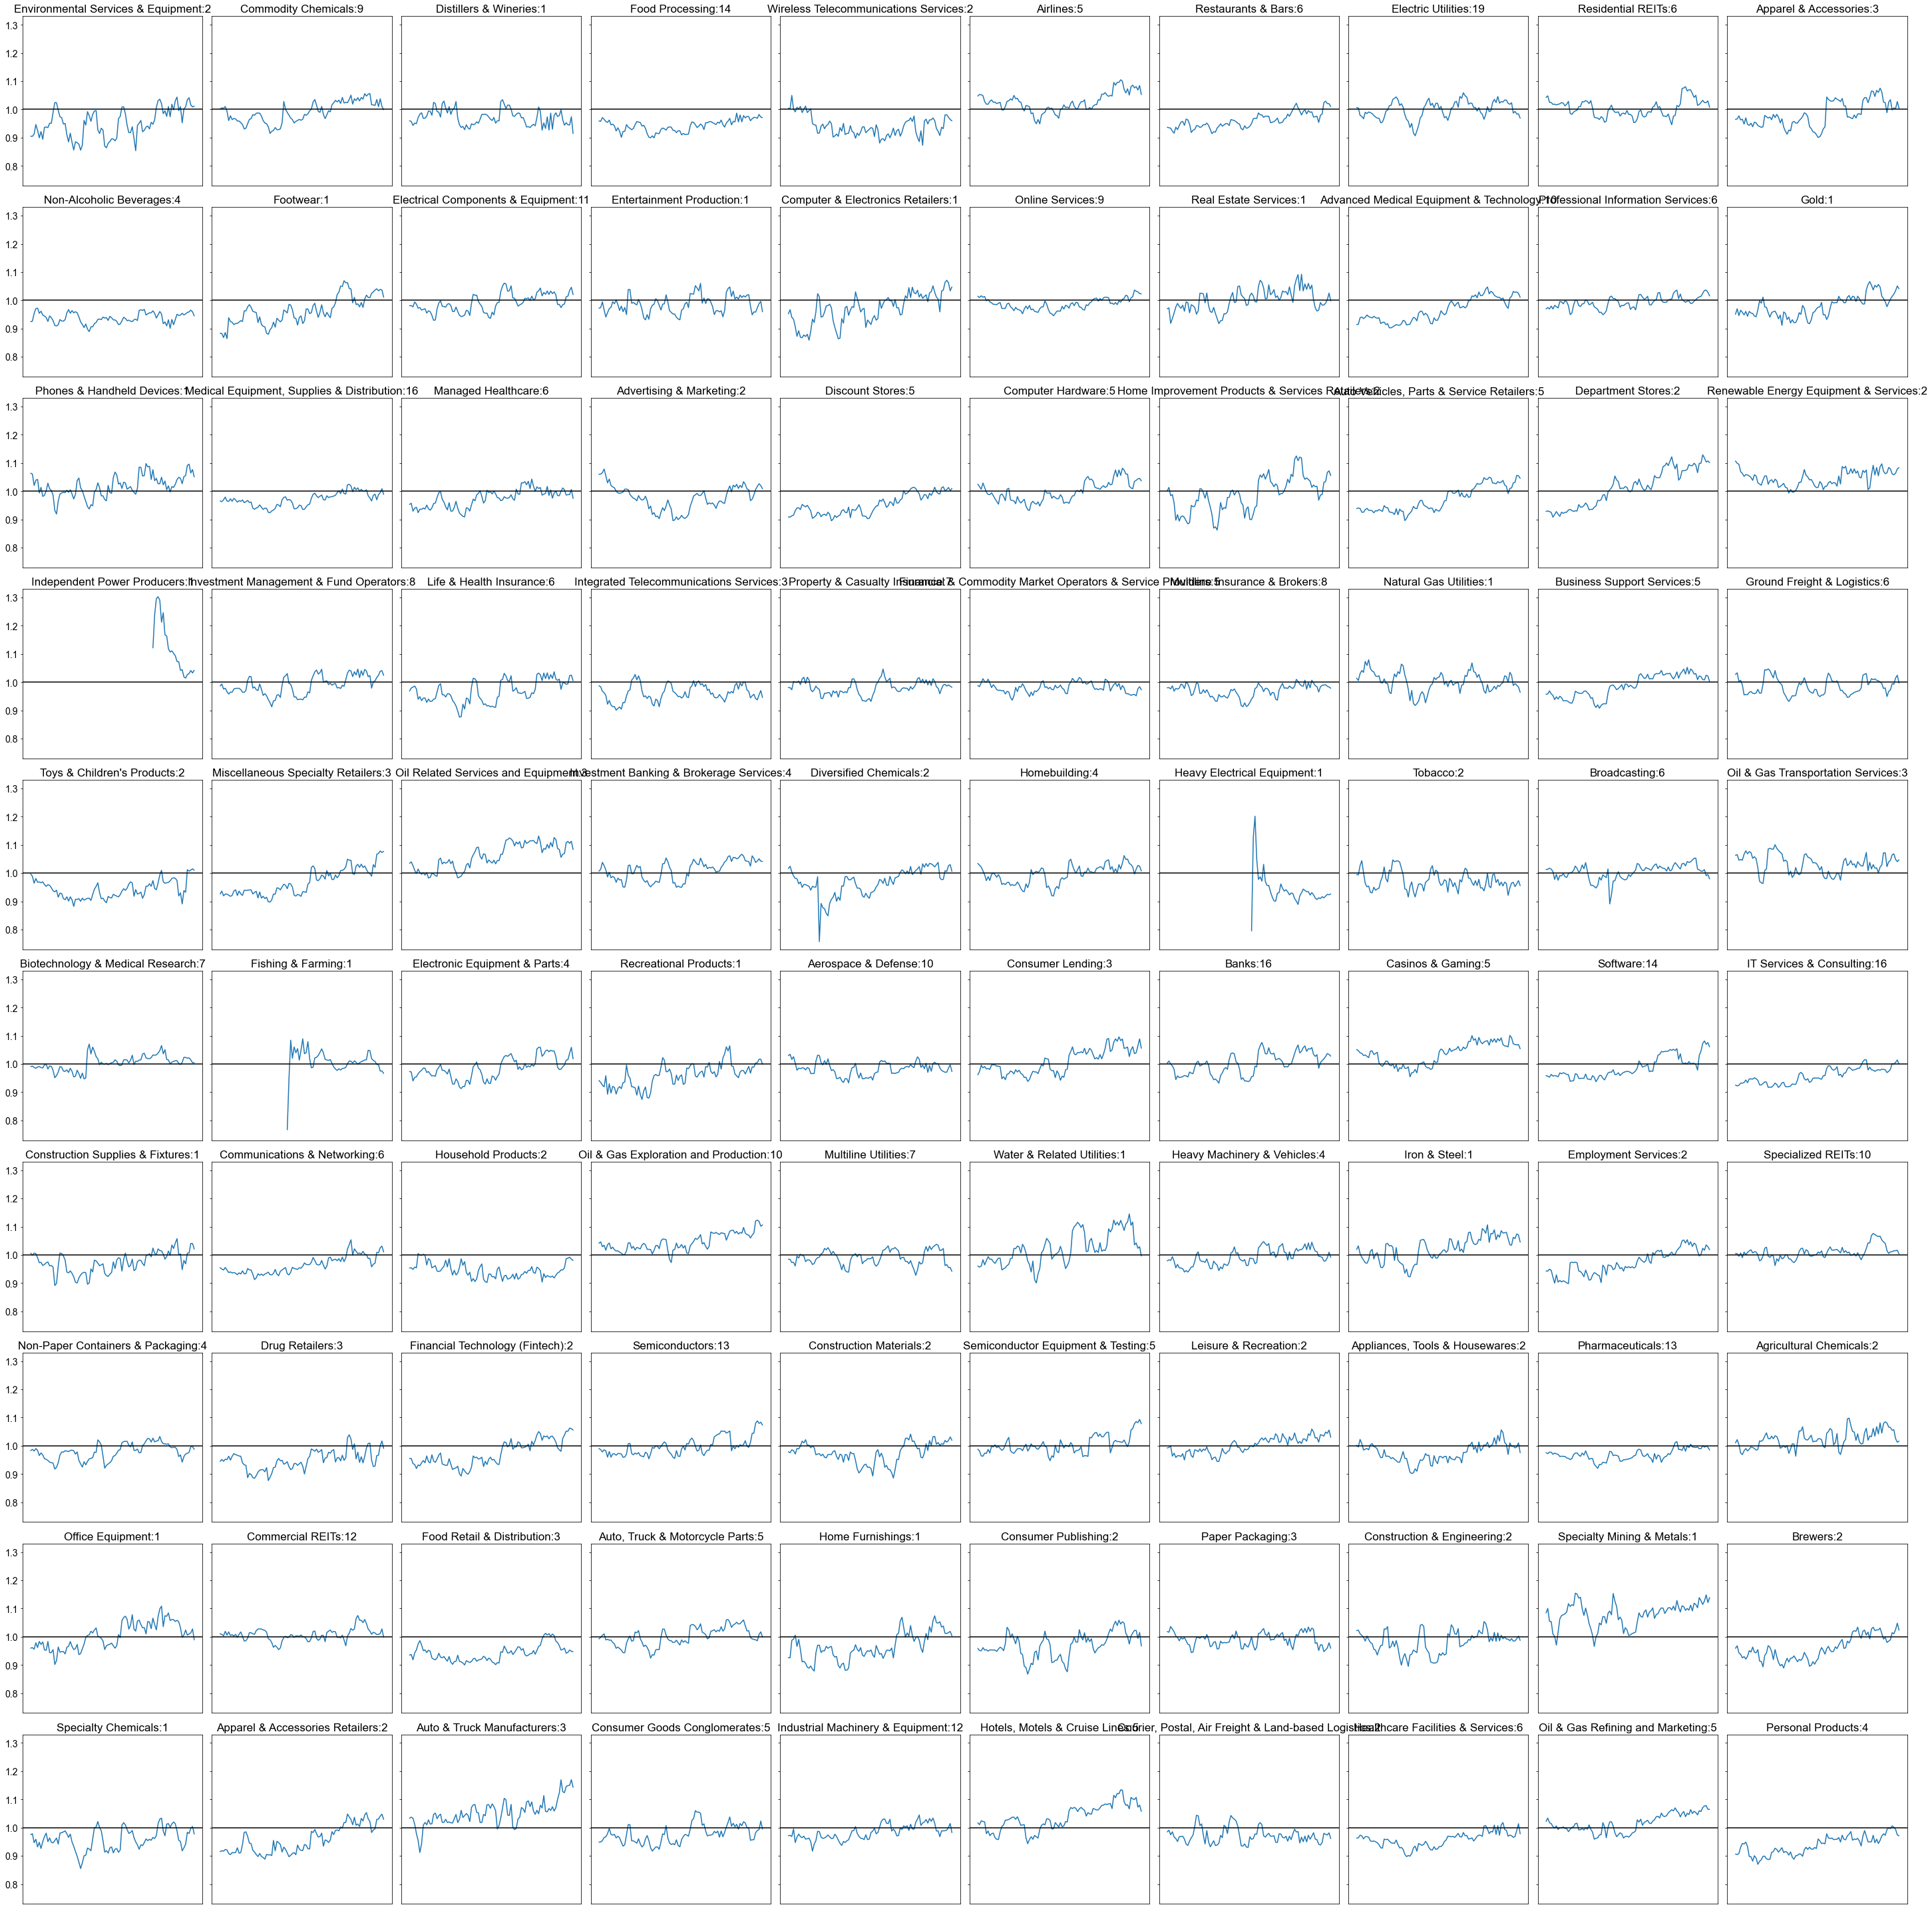

Increa in : 0.0 %


In [4]:

len_min = 10
len_max = 20
fig, axs = plt.subplots(10,10,figsize=(40,40), sharex=True, sharey=True)
red_line = '2020-03-01'
exp_list, dates_list, increase_list = [], [],[]

print(f"Start:{start_date}\nEnd:{end_date},\nRed Line:{red_line}")

sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'Times New Roman'

# Make the plot with style darkgrid


for i,industry in enumerate(set(df['Industry Name'])):

    # Filter the data by industry
    df_industry = df[df['Industry Name'] == industry]
    # Selection of the lenght 
    df_1 = df_industry[[x for x in  df_industry.columns if f'task1_len_{len_min}_{len_max}_' in x]]
    
    y = df_1.mean().values #Average all the exponenets of the comp in the industry
    exp_list.append(y)
    x = [x[-10:] for x in df_1.columns] # Extract the dates
    dates_list.append(x)
    
    row_met,col_ind= i//10,i-(i//10)*10
    axs[row_met, col_ind].plot(x,y)
    axs[row_met, col_ind].set_title(f'{industry}:{df_industry.shape[0]}', fontsize=17)
    axs[row_met, col_ind].set_xticks([])
    # horizontal line
    axs[row_met, col_ind].axhline(y=1,color='black')
    #axs[row_met, col_ind].ayvline(x=red_line,color='red')
    increase_list.append(y[5]<y[-1])
    axs[row_met, col_ind].tick_params(axis='y', labelsize=14)  # Change the y-tick label size here


plt.tight_layout()
plt.savefig('plots/expomemt_by_industry.pdf', format='pdf')
plt.show()
print('Increa in :',sum(increase_list)/len(increase_list)*100,'%')


In [12]:
x

['2016-04-01',
 '2016-05-01',
 '2016-06-01',
 '2016-07-01',
 '2016-08-01',
 '2016-09-01',
 '2016-10-01',
 '2016-11-01',
 '2016-12-01',
 '2017-01-01',
 '2017-02-01',
 '2017-03-01',
 '2017-04-01',
 '2017-05-01',
 '2017-06-01',
 '2017-07-01',
 '2017-08-01',
 '2017-09-01',
 '2017-10-01',
 '2017-11-01',
 '2017-12-01',
 '2018-01-01',
 '2018-02-01',
 '2018-03-01',
 '2018-04-01',
 '2018-05-01',
 '2018-06-01',
 '2018-07-01',
 '2018-08-01',
 '2018-09-01',
 '2018-10-01',
 '2018-11-01',
 '2018-12-01',
 '2019-01-01',
 '2019-02-01',
 '2019-03-01',
 '2019-04-01',
 '2019-05-01',
 '2019-06-01',
 '2019-07-01',
 '2019-08-01',
 '2019-09-01',
 '2019-10-01',
 '2019-11-01',
 '2019-12-01',
 '2020-01-01',
 '2020-02-01',
 '2020-03-01',
 '2020-04-01',
 '2020-05-01',
 '2020-06-01',
 '2020-07-01',
 '2020-08-01',
 '2020-09-01',
 '2020-10-01',
 '2020-11-01',
 '2020-12-01',
 '2021-01-01',
 '2021-02-01',
 '2021-03-01',
 '2021-04-01',
 '2021-05-01',
 '2021-06-01',
 '2021-07-01',
 '2021-08-01',
 '2021-09-01',
 '2021-10-

Start:2012-07-01 00:00:00
End:2022-07-01 00:00:00


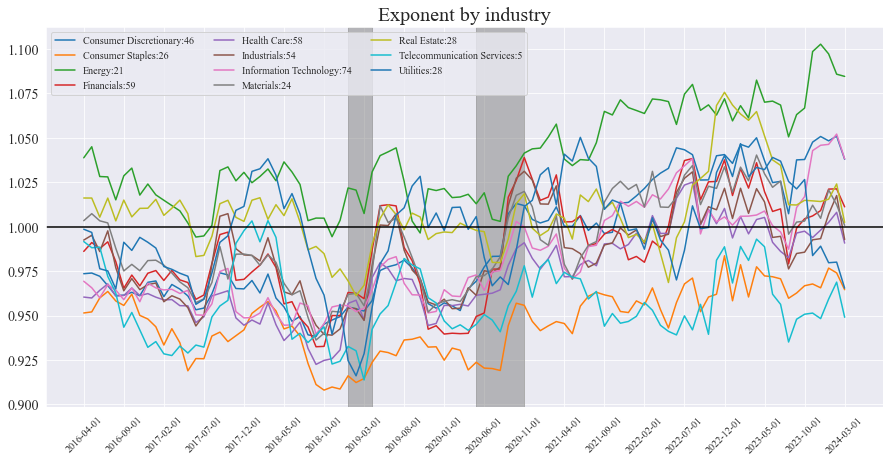

In [26]:

lenghts_min = [10,100,400,800]
lenghts_max = [20,200,500,1_000]

len_min = lenghts_min[0]
len_max = lenghts_max[0]
plt.subplots(1,1,figsize=(15,7), sharex=True, sharey=True)
exp_list, dates_list, increase_list = [], [],[]

print(f"Start:{start_date}\nEnd:{end_date}")

sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'Times New Roman'

for i,(industry,list_of_companies) in enumerate(broad_sectors.items()):

    # Filter by the name of the companies
    name_of_columns = [x for x in  df.columns if f'task1_len_{len_min}_{len_max}_' in x]
    mask_companies = df['Industry Name'].isin(list_of_companies)
    df_industry = df[name_of_columns][mask_companies]
    
    y = df_industry.mean().values #Average all the exponenets of the comp in the industry
    exp_list.append(y)
    x = [x[-10:] for x in df_industry.columns] # Extract the dates
    dates_list.append(x)
    
    row_met,col_ind= i//4,i-(i//4)*4
    plt.plot(x,y, label=f'{industry}:{df_industry.shape[0]}')
    #plt.set_title(f'{industry}:{df_industry.shape[0]}', fontsize=17)
    #plt.set_xticks([])
    # change the frequancy of the x-axis
    plt.xticks(ticks=range(0,len(y),5),labels=x[::5],rotation=45)
    plt.tick_params(axis='y', labelsize=14)  # Change the y-tick label size here

# make a vertical band 
plt.axvspan('2019-01-01', '2019-04-01', alpha=0.5, color='gray')
plt.axvspan('2020-05-01', '2020-11-01', alpha=0.5, color='gray')

plt.axhline(y=1,color='black')
plt.legend(ncol=3)
plt.title('Exponent by industry', fontsize=20)
plt.savefig('plots/expomemt_by_industry.pdf', format='pdf')
plt.show()

In [6]:
def are_all_lists_equal(list_of_lists):
    first_list = list_of_lists[0]
    for inner_list in list_of_lists[1:]:
        if inner_list != first_list:
            return False
    return True
print("All dates are the same?",are_all_lists_equal(dates_list))

All dates are the same? True


We can see how the exponent behace un avaeraga

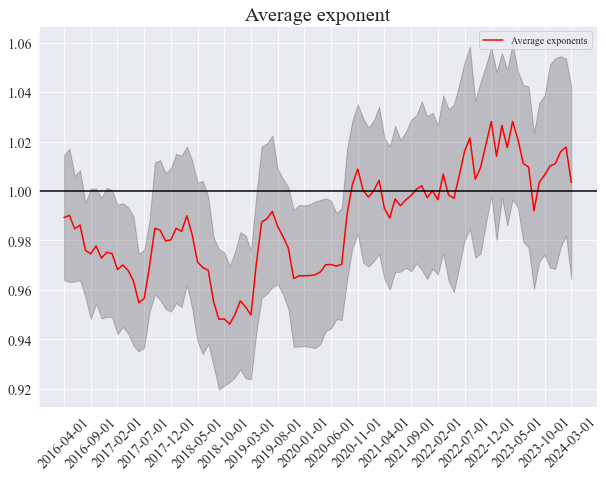

In [7]:
plt.subplots(1,1,figsize=(10,7), sharex=True, sharey=True)
sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'Times New Roman'

exp_list = np.array(exp_list)

df_average_exp = pd.DataFrame(exp_list, columns=dates_list[0])
df_average_exp
average = df_average_exp.mean()
std_exp = df_average_exp.std()

plt.plot(dates_list[0],average, color='r', label='Average exponents')
plt.xticks(ticks=range(0,len(dates_list[0]),5),labels=dates_list[0][::5],rotation=45, fontsize=14)
plt.tick_params(axis='y', labelsize=14)  # Change the y-tick label size here
plt.fill_between(dates_list[0], average-std_exp, average+std_exp, color='k', alpha=0.2)

plt.axhline(y=1,color='black')
plt.legend()
plt.savefig('plots/average_exp.pdf', format='pdf')
plt.title('Average exponent', fontsize=20)
plt.show()


### Other way to approximante the exponent

The Time Average Mean Squared Displacement (TAMSD) is used to identifiy anomalous diffusion and it defines how a particle or in this case the stock price, deviate from its starting position over a period of time. With TAMSD we can measure the exponenet of an annomalous diffusion proccess and see if the Mean Squared Displacement (MSD) increase slower (subdiffusion) or faster (superdiffusion) than the normal diffusion.  

For example if we use the company 'AAPL' returns between 1st of July 20212 and 1st July 2022, for windows between [400-500]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [2]:
data = 'analisis/S&P_500_exp.xlsx'
df = pd.read_excel(data)
df.head()

,Identifier,Company Name,Industry Name,task1_len_10_20_2012-04-01_2016-04-01,task1_len_10_20_2012-05-01_2016-05-01,task1_len_10_20_2012-06-01_2016-06-01,task1_len_10_20_2012-07-01_2016-07-01,task1_len_10_20_2012-08-01_2016-08-01,task1_len_10_20_2012-09-01_2016-09-01,task1_len_10_20_2012-10-01_2016-10-01,...,task1_len_800_1000_2019-07-01_2023-07-01,task1_len_800_1000_2019-08-01_2023-08-01,task1_len_800_1000_2019-09-01_2023-09-01,task1_len_800_1000_2019-10-01_2023-10-01,task1_len_800_1000_2019-11-01_2023-11-01,task1_len_800_1000_2019-12-01_2023-12-01,task1_len_800_1000_2020-01-01_2024-01-01,task1_len_800_1000_2020-02-01_2024-02-01,task1_len_800_1000_2020-03-01_2024-03-01,task1_len_800_1000_2020-04-01_2024-04-01
0,AFL.N,Aflac Inc,Life & Health Insurance,0.959348,0.964121,0.926504,0.924578,0.938306,0.912541,0.911130,...,0.668226,0.658176,0.612339,0.621072,0.649364,0.637304,0.658751,0.651822,0.542427,NaN
1,AES.N,AES Corp,Electric Utilities,0.996048,0.992039,0.954067,0.944598,0.932716,0.997966,0.977847,...,0.512916,0.526264,0.539292,0.605194,0.535703,0.522856,0.524842,0.553242,0.540868,NaN
2,ABT.N,Abbott Laboratories,"Medical Equipment, Supplies & Distribution",0.963707,0.964086,0.949677,0.971546,0.935163,0.903810,0.904841,...,0.610392,0.624433,0.629110,0.606910,0.580822,0.602725,0.711318,0.603388,0.527936,NaN
3,ADBE.OQ,Adobe Inc,Software,0.939528,0.943733,0.923039,0.917141,0.924298,0.948878,0.922875,...,0.899448,0.888585,1.015169,1.083877,1.151834,0.881059,0.779029,0.792226,0.700343,NaN
4,AMD.OQ,Advanced Micro Devices Inc,Semiconductors,1.058579,1.064546,1.030501,1.042941,1.022485,1.025964,0.993146,...,0.859880,0.931343,1.202888,1.208925,1.107388,1.041712,0.881329,0.765979,0.728549,NaN


In [3]:
def TAMSD(traj, t_lags):
    """
    Calculates the time average mean squared displacement of a set of trajectories
    Inputs: - traj: trajectory to calculate TA-MSD
            - t_lags: time lags used for the TA-MSD
    Outputs: - TA-MSD
    """
    tamsd = np.zeros_like(t_lags, dtype=float)
    for idx, t in enumerate(t_lags):
        for p in range(len(traj) - t):
            tamsd[idx] += (traj[p] - traj[p + t]) ** 2
        tamsd[idx] /= len(traj) - t
    return tamsd

In [4]:
ticker = 'AAPL.OQ'
window1,window2 = '400', '500'

interval1,interval2 = '2012-04-01','2016-04-01'
window1,window2 = '400', '500'
trajs1 = np.loadtxt(f'data/{ticker}-{interval1}-{interval2}-{window1}-{window2}.txt',delimiter=";",dtype=np.float32)
print(len(trajs1))
exp_predicted = df[df['Identifier'] == ticker][f'task1_len_{window1}_{window2}_{interval1}_{interval2}'].values[0]

2


In [5]:
ticker = 'AAPL.OQ'
window1,window2 = '400', '500'

In [20]:


trajs = []
exp_predicted = []
dates = []

for i in range(0,12*5,12):
    date1 = datetime(2012,4,1) + relativedelta(months=i)
    date2 = datetime(2016,4,1) + relativedelta(months=i)
    date1 = date1.strftime('%Y-%m-%d')
    date2 = date2.strftime('%Y-%m-%d')
    print(date1,date2)
    trajs.append(np.loadtxt(f'data/{ticker}-{date1}-{date2}-{window1}-{window2}.txt',delimiter=";",dtype=np.float32)[0])
    dates.append(date1+'_'+date2)
    exp_predicted.append(df[df['Identifier'] == ticker][f'task1_len_{window1}_{window2}_{date1}_{date2}'].values[0])
print(len(trajs),len(dates))


2012-04-01 2016-04-01
2013-04-01 2017-04-01
2014-04-01 2018-04-01
2015-04-01 2019-04-01
2016-04-01 2020-04-01
5 5


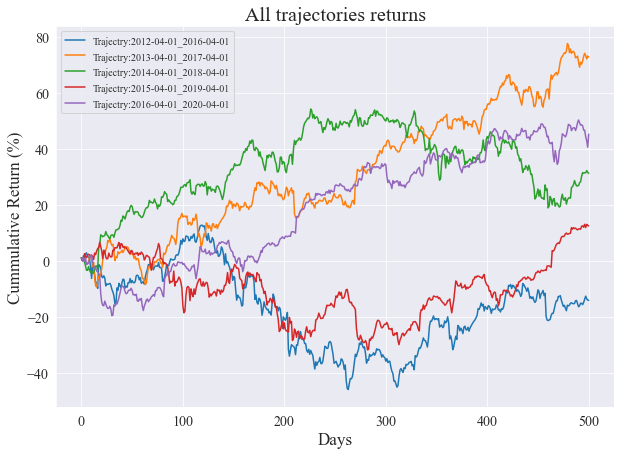

In [22]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'Times New Roman'

# Plot all the trajectories
for idx,traj in enumerate(trajs):
    plt.plot(traj,label=f"Trajectry:{dates[idx]}")

plt.title('All trajectories returns', fontsize=20,fontname='Times New Roman')
plt.xlabel('Days',fontname='Times New Roman',fontsize=17)
plt.ylabel('Cummulative Return (%)',fontname='Times New Roman',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.savefig('plots/returns_example.pdf', format='pdf')
plt.show()


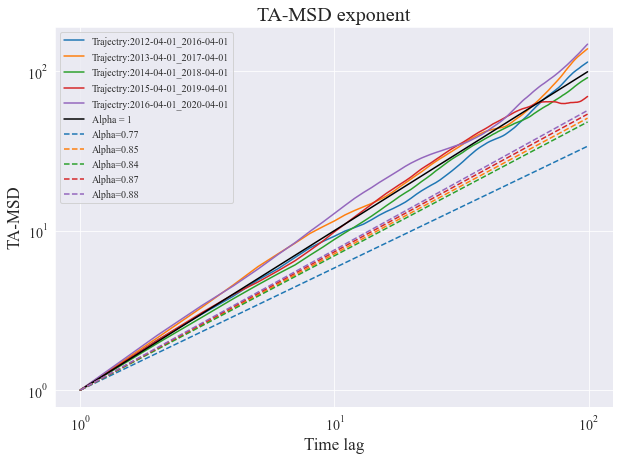

In [25]:

# Calculate the TA-MSD for each trajectory and plot it
T = 100 # Number of time lags
t_lags = np.arange(1, T)
plt.figure(figsize=(10,7))

# For each trajectory, calculate the TA-MSD and plot it, and label it the number of the trajectory with enumerate
for idx, traj in enumerate(trajs):
    tamsd = TAMSD(traj, t_lags)
    # Normalize the TA-MSD by the first time lag
    tamsd /= tamsd[0]
    line_color = sns.color_palette()[idx]
    plt.loglog(t_lags, tamsd, label=f"Trajectry:{dates[idx]}", c=line_color)

plt.title(f'TA-MSD exponent',fontname='Times New Roman', fontsize=20)   
plt.loglog(t_lags, t_lags, c="k", label=r"Alpha = 1")
alpha = exp_predicted  # Anomalous diffusion exponent
for idx, alpha in enumerate(exp_predicted):
    line_color = sns.color_palette()[idx]
    plt.loglog(t_lags, t_lags**alpha, ls="--", label=f"Alpha={round(alpha,2)}", c=line_color)
plt.xlabel('Time lag',fontname='Times New Roman', fontsize=17)
plt.ylabel('TA-MSD',fontname='Times New Roman', fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()

plt.savefig('plots/TAMSD_relation.pdf', format='pdf')
plt.show()

### Comparison between the volatility of the market in the expoenet

Currently the two main volatility measure of the stock are the historical volatility, which is the standard deviation of historical returns, or the implied volitility, which is the market's forecast of how much a stock's price his expexted to fluctuate. 
Explicar con más detalle los que son la Implied volitility y las histprica, mostrando una matriz ejemplo

So if we want to see if the standard market volatility behaves similarly to our proposed volatility calculated as the anomalous spread exponent. We can analyze the correlation between the historical, implied volatility and the exponent.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

sns.set_theme(style="ticks")


In [2]:
# Import the S&P_500_IV.xlsx file, the S&P_500_HV_20.csv file and the S&P_500_exp.xlsx file
lenght1 = 100
lenght2 = 200

path_sp_hv = f'analisis/S&P_500_HV_{lenght2}.csv'
df_hv = pd.read_csv(path_sp_hv)
df_hv = df_hv.add_prefix('HV_')
df_hv = df_hv.rename(columns={'HV_Unnamed: 0':'Identifier'})

path_sp_iv = f'analisis/S&P_500_IV_{lenght2}.csv'
df_iv = pd.read_csv(path_sp_iv)
df_iv = df_iv.add_prefix('IV_')
df_iv = df_iv.rename(columns={'IV_Unnamed: 0':'Identifier'})

path_sp_exp = 'analisis/S&P_500_exp.xlsx'
df_exp = pd.read_excel(path_sp_exp)
df_exp = df_exp[['Identifier']+[x for x in df_exp.columns if f'task1_len_{lenght1}' in x]]

path_sp = 'analisis/S&P_500.xlsx'
df_sp = pd.read_excel(path_sp)

In [3]:
# check ithe Identifier columns is the same 
are_columns_same = (df_hv['Identifier'] == df_iv['Identifier']).all()
print(are_columns_same)
are_columns_same = (df_hv['Identifier'] == df_exp['Identifier']).all()
print(are_columns_same)

True
True


In [4]:
# Creata a df with the mean of the exponents
df_average = pd.DataFrame({'HV':df_hv.mean(axis=1),'IV':df_iv.mean(axis=1),'exp':df_exp.mean(axis=1)})

C:\Users\Ruben\AppData\Local\Temp\ipykernel_11212\3320547013.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_average = pd.DataFrame({'HV':df_hv.mean(axis=1),'IV':df_iv.mean(axis=1),'exp':df_exp.mean(axis=1)})


In [5]:
df = df_average
df.dropna(inplace=True)

def annotate_corr(x, y, **kws):
    r, p = pearsonr(x, y)
    ax = plt.gca()  # Get the current Axes instance on the current figure
    sns.regplot(x=x, y=y, ax=ax,scatter=False)  # Plot the regression line without scatter
    ax.annotate(f'r = {r:.2f}\np = {p:.3f}', xy=(.05, .95), xycoords=ax.transAxes, 
                ha='left', va='top', bbox=dict(boxstyle="round", alpha=0.5, color='lightgray'))

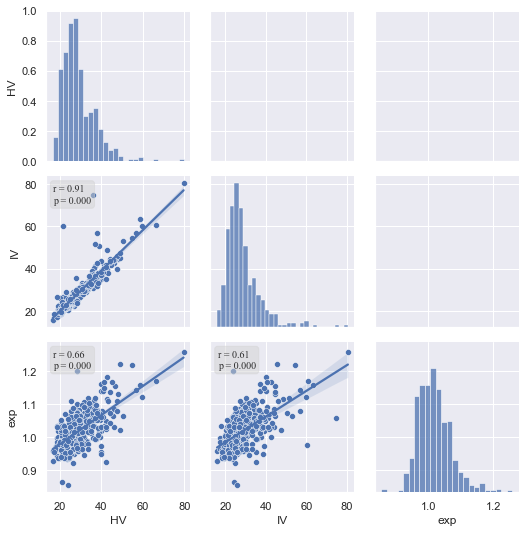

In [11]:
# Create an instance of PairGrid
sns.set_style("darkgrid")

g = sns.PairGrid(df)
plt.rcParams['font.family'] = 'Times New Roman'


# Map the plots to different parts of the grid
#g.map_upper(sns.scatterplot)  # Scatter plot on the upper part
g.map_lower(annotate_corr)    # Annotate the upper part with the correlation
g.map_lower(sns.scatterplot)      # KDE plot on the lower part
g.map_diag(sns.histplot)      # Histogram on the diagonal


plt.savefig('plots/plot_corr_vols.pdf', format='pdf')
plt.show()


<AxesSubplot:>

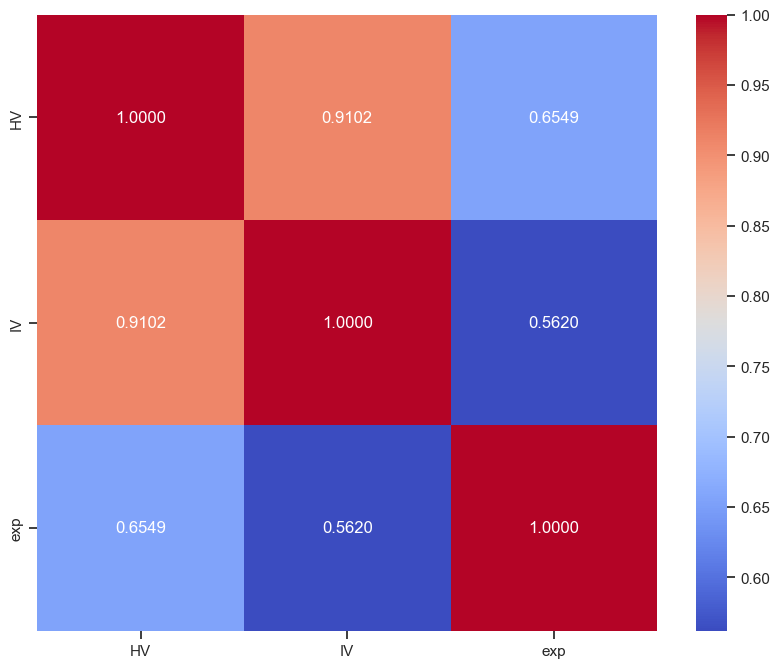

In [8]:

correlation_matrix = df_average.corr()
p_value_matrix = df_average.corr(method='pearson').apply(lambda x: x.apply(lambda y: f'{y:.4f}'))
# plot the p_value_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=p_value_matrix, cmap='coolwarm', fmt='s')

In [9]:
# Extract the correlation values from the correlation matrix
correlation_values = correlation_matrix.values

# Create an empty matrix for the p-values
p_value_matrix = np.zeros_like(correlation_values)

# Calculate the p-value for each pair of variables
for i in range(len(correlation_values)):
    for j in range(len(correlation_values)):
        if i == j:
            p_value_matrix[i, j] = 1.0
        else:
            df_average_clean = df_average.dropna(subset=[df_average.columns[i], df_average.columns[j]])
            _, p_value = pearsonr(df_average_clean.iloc[:, i], df_average_clean.iloc[:, j])
            p_value_matrix[i, j] = p_value

# Create a DataFrame from the p-value matrix
p_value_matrix = pd.DataFrame(p_value_matrix, index=correlation_matrix.index, columns=correlation_matrix.columns)
print(p_value_matrix)


                HV             IV           exp
HV    1.000000e+00  6.344034e-181  5.637982e-56
IV   6.344034e-181   1.000000e+00  1.705994e-39
exp   5.637982e-56   1.705994e-39  1.000000e+00


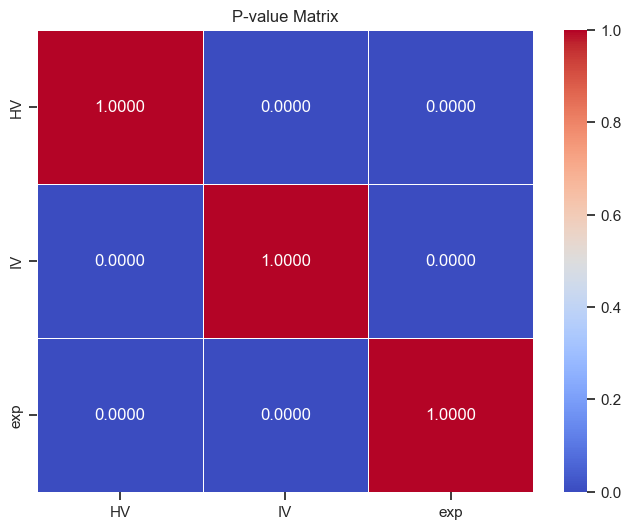

In [10]:
# Visualize p-value matrix
plt.figure(figsize=(8, 6))
sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('P-value Matrix')
plt.show()


### Model prediction
Finally, in the AnDi-challenge task number 2 consisted of classifying the diffusion model followed by the series. This will help us to better understand what type of process we are observing. The 4 types of models are the following:
Explaining the 4 and their characteristics, we estimate the model under which the estimates behave.

The model used for this task is the following structure.

Using this model for the series we obtain that the most probable type of process is ATM.

Translated with DeepL.com (free version)

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pandas as pd
from keras.models import load_model
import os
import seaborn as sns
import matplotlib.pyplot as plt


Importamos el modelo de classificacion

In [2]:
path_model = "regression_-005-0.3333.h5"
model = load_model(path_model)

In [3]:
print(model.input_shape)
model.summary()

(None, 23, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 32)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            10304     
                                                                 
 bidirectional (Bidirectiona  (None, 15, 64)           24832     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)    

In [4]:
dot_graph = model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=65)
# Save the dot graph to an image file
dot_graph.write_pdf('model_task2.pdf')

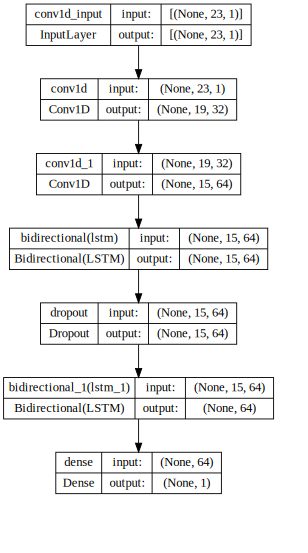

In [5]:
SVG(dot_graph.create(prog='dot', format='svg'))

In [17]:
# Distribution of the clasifications
files = os.listdir('preds/')
len_min = 100
len_max = 200
files = [x for x in files if "SIN_TRAYECTORIAS" not in x and f"{len_min}-{len_max}.txt" in x]
list_means = []
list_names = []

for file in files:
    stock = file.split('-', maxsplit=1)[0].split('_')[1]
    df_ = pd.read_csv('preds/'+file, sep=';',header=None)
    list_means.append(list(df_.mean()*100))
    list_names.append(stock)


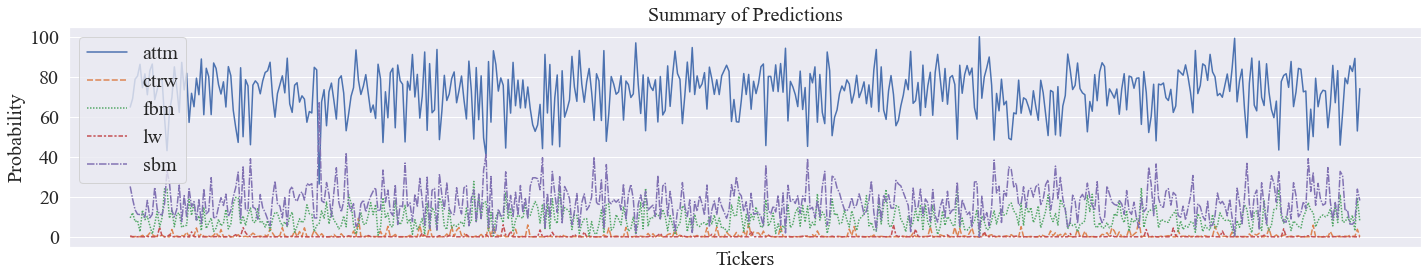

In [24]:
plt.figure(figsize=(20, 4))
sns.set_theme(style="darkgrid")
# Times new roman font
plt.rcParams['font.family'] = 'Times New Roman'

df_summary_preds = pd.DataFrame(list_means, columns=['attm', 'ctrw', 'fbm', 'lw', 'sbm'])
df_summary_preds.index = list_names
sns.lineplot(data=df_summary_preds)

plt.title("Summary of Predictions", fontsize=20, fontname='Times New Roman')
plt.xlabel("Tickers", fontsize=20, fontname='Times New Roman')
# increase the size of the yticks
plt.yticks(fontsize=20)
plt.gca().set_xticks([])
plt.ylabel("Probability", fontsize=20, fontname='Times New Roman')
plt.legend(fontsize=20)
plt.tight_layout()

plt.savefig('plots/clasification_of_models.pdf', format='pdf')
plt.show()

Para estar seguro hacemos esto para todas las predicciones

In [91]:
# Distribution of the clasifications
files = os.listdir('preds/')
files = [x for x in files if "SIN_TRAYECTORIAS" not in x]
list_means = []
list_names = []
len(file)

for file in files:
    stock = file.split('-', maxsplit=1)[0].split('_')[1]
    df_ = pd.read_csv('preds/'+file, sep=';',header=None)
    list_averages = list(df_.mean())
    if 1 not in list_averages:
        list_means.append(list(df_.mean()))
        list_names.append(file)

In [93]:
df_summary_preds = pd.DataFrame(list_means, columns=['attm', 'ctrw', 'fbm', 'lw', 'sbm'])
df_summary_preds['file'] = list_names
lenghts = [x.split('-')[-1][:-4] for x in list_names]
df_summary_preds['Size'] = lenghts
df_summary_preds['Identifier'] = [x.split('-', maxsplit=1)[0].split('_')[1] for x in list_names]
df_summary_preds

# read the S&P_500.xlsx file
path_sp = 'analisis/S&P_500.xlsx'
df_sp = pd.read_excel(path_sp)
df_summary_preds = pd.merge(df_summary_preds,df_sp, on='Identifier')
df_summary_preds

,attm,ctrw,fbm,lw,sbm,file,Size,Identifier,Company Name,Industry Name
0,0.245202,0.108150,0.245202,0.190058,0.211387,pred_A.N-2012-07-01-2022-07-01-10-20.txt,20,A.N,Agilent Technologies Inc,Advanced Medical Equipment & Technology
1,0.648235,0.000588,0.094706,0.004706,0.251765,pred_A.N-2012-07-01-2022-07-01-100-200.txt,200,A.N,Agilent Technologies Inc,Advanced Medical Equipment & Technology
2,0.950000,0.000000,0.002000,0.000000,0.048000,pred_A.N-2012-07-01-2022-07-01-400-500.txt,500,A.N,Agilent Technologies Inc,Advanced Medical Equipment & Technology
3,0.290138,0.093379,0.184207,0.184414,0.247862,pred_AAL.OQ-2012-07-01-2022-07-01-10-20.txt,20,AAL.OQ,American Airlines Group Inc,Airlines
4,0.690714,0.000714,0.120000,0.000000,0.188571,pred_AAL.OQ-2012-07-01-2022-07-01-100-200.txt,200,AAL.OQ,American Airlines Group Inc,Airlines
...,...,...,...,...,...,...,...,...,...,...
1260,0.260118,0.097811,0.235858,0.184142,0.222071,pred_ZION.OQ-2012-07-01-2022-07-01-10-20.txt,20,ZION.OQ,Zions Bancorporation NA,Banks
1261,0.528824,0.037647,0.195294,0.000000,0.238235,pred_ZION.OQ-2012-07-01-2022-07-01-100-200.txt,200,ZION.OQ,Zions Bancorporation NA,Banks
1262,0.902000,0.000000,0.034000,0.000000,0.064000,pred_ZION.OQ-2012-07-01-2022-07-01-400-500.txt,500,ZION.OQ,Zions Bancorporation NA,Banks
1263,0.248954,0.102745,0.265686,0.166797,0.215817,pred_ZTS.N-2012-07-01-2022-07-01-10-20.txt,20,ZTS.N,Zoetis Inc,Pharmaceuticals


In [105]:
# Averge by size
df_summary_means = df_summary_preds[df_summary_preds['Size']=='200'].groupby('Industry Name').mean().round(2)
# convert this data frame to a latex table
#print(df_summary_means.to_latex(index=False))
df_summary_means

,attm,ctrw,fbm,lw,sbm
Industry Name,,,,,
Advanced Medical Equipment & Technology,0.80,0.01,0.05,0.00,0.13
Advertising & Marketing,0.79,0.03,0.06,0.01,0.10
Aerospace & Defense,0.72,0.01,0.11,0.00,0.17
Agricultural Chemicals,0.62,0.00,0.18,0.00,0.19
Airlines,0.62,0.01,0.17,0.00,0.20
...,...,...,...,...,...
Specialty Mining & Metals,0.68,0.00,0.12,0.00,0.19
Tobacco,0.70,0.01,0.11,0.00,0.19
Toys & Children's Products,0.82,0.02,0.05,0.00,0.11


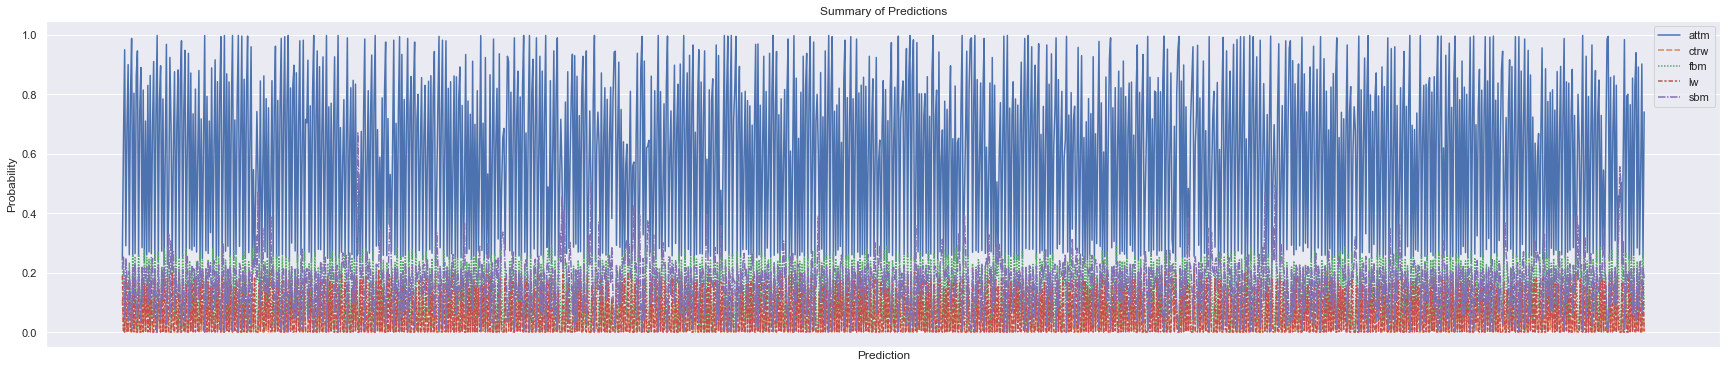

              attm         ctrw          fbm           lw          sbm
count  1313.000000  1313.000000  1313.000000  1313.000000  1313.000000
mean      0.586118     0.044047     0.133493     0.065987     0.170355
std       0.281912     0.052202     0.100826     0.082996     0.090508
min       0.221377     0.000000     0.000000     0.000000     0.000000
25%       0.261923     0.000000     0.039444     0.000000     0.105294
50%       0.652000     0.004118     0.112500     0.000588     0.204756
75%       0.830000     0.098824     0.242147     0.164233     0.220508
max       0.998000     0.161386     0.290427     0.215962     0.670000


In [54]:
plt.figure(figsize=(30, 6))
sns.set_theme(style="darkgrid")

sns.lineplot(data=df_summary_preds)

plt.title("Summary of Predictions")
plt.xlabel("Prediction")
plt.gca().set_xticks([])
plt.ylabel("Probability")
plt.show()
print(df_summary_preds.describe())

In [ ]:
task = 2
path = 'ANDI_Challenge/models/task1'
data = 'analisis/S&P_500_analisis.xlsx'

for len_min,len_max in zip([10,100,400,800],[20,200,500,1_000]):
    name_model = f'task{task}_len_{len_min}_{len_max}.h5'
    df = pd.read_excel(data,index_col=0)
    # Load the data and prepare
    model = load_model(os.path.join(path,name_model))

    # Make predictions
    df = predict_task2(model,df,start_date, end_date,task,len_min,len_max,now)
    df.to_excel(data)
    print(len_min,'-',len_max)